In [5]:
import numpy as np
import pandas as pd
import os
import datetime
from matplotlib import pyplot as plt

In [6]:
def read_txt(filename):
    save_ls = []
    with open(filename, 'r') as file:
        for line in file:
            line = line.split(',')
            for val in line:
                save_ls.append(val)
    return save_ls

# read in sensor data
m2 = read_txt('./collection2/CS109a_motion.txt')
m3 = read_txt('./collection3/CS109a_motion.txt')
m4 = read_txt('./collection4/CS109a_motion.txt')
m5 = read_txt('./collection5/CS109a_motion.txt')

In [7]:
# generate start times (every 30 minutes) from initial start dates
oct29 = datetime.datetime(2019, 10, 29, hour=12, minute=42)
nov3 = datetime.datetime(2019, 11, 3, hour=9, minute=30)
nov6 = datetime.datetime(2019, 11, 6, hour=21, minute=13)
nov11 = datetime.datetime(2019, 11, 11, hour=12, minute=50)

def compute_time_int(start_dt, m):
    dates = [start_dt]
    for i in range(len(m)-1): 
        dates.append(dates[i] + datetime.timedelta(seconds=1))
    df = pd.DataFrame({'date': dates,'motion': m})
    df.drop(df.tail(1).index,inplace=True)
    return df
    

df1 = compute_time_int(oct29, m2)
df2 = compute_time_int(nov3, m3)
df3 = compute_time_int(nov6, m4)
df4 = compute_time_int(nov11, m5)
# drop last empty row

In [10]:
for df in [df1,df2,df3,df4]:
    print(df.shape)

(353999, 2)
(300760, 2)
(300760, 2)
(356399, 2)


In [11]:
def convert_to_float(dfs):
    for df in dfs:
        df.hum = [float(i) for i in df.motion]
        
dfs = [df1,df2,df3,df4]   
convert_to_float(dfs)

In [37]:
motion = pd.concat([df1,df2,df3,df4], axis=0)

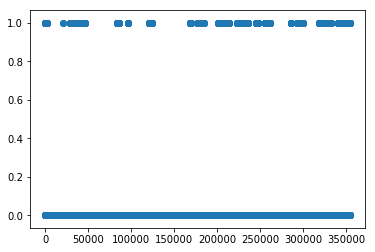

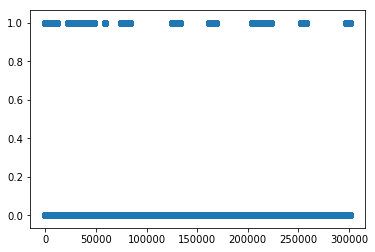

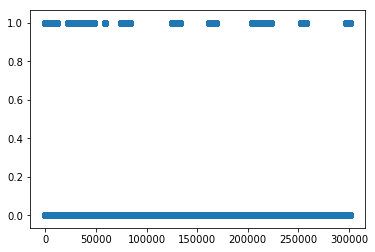

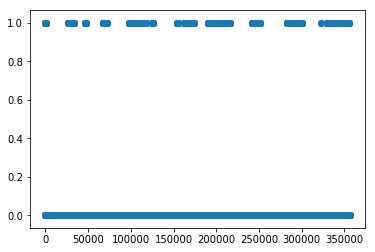

In [15]:
for df in dfs:
    plt.scatter(np.arange(df.shape[0]),df.motion) #np.arange(humidity.shape[0]),
    plt.show()

In [13]:
motion.head()

,date,motion
0,2019-10-29 12:42:00,1.00
1,2019-10-29 12:42:01,1.00
2,2019-10-29 12:42:02,1.00
3,2019-10-29 12:42:03,1.00
4,2019-10-29 12:42:04,1.00


In [44]:
motion['hour'] = 0
motion['day'] = 0
for i,dt in enumerate(motion.date):
    motion.loc[i,'hour'] = dt.hour
    motion.loc[i,'day'] = dt.day

KeyboardInterrupt: 

In [45]:
# aggregate 
motion.head()

,date,motion,hour,day
0,2019-10-29 12:42:00,1.00,12,29
1,2019-10-29 12:42:01,1.00,12,29
2,2019-10-29 12:42:02,1.00,12,29
3,2019-10-29 12:42:03,1.00,12,29
4,2019-10-29 12:42:04,1.00,12,29


In [ ]:
motion.groupby(['hour', 'day'])['motion'].sum()

In [29]:
# hours = np.arange(0,24)
# indices_of_hours = []

# hourly_motion_dict = {}
# for hr in hours:
#     hourly_motion_dict[hr] = 0
    
# for i,dt in enumerate(motion.date):
#     hourly_motion_dict[dt.hour] += 1
# # hourly_motion_dict

In [46]:
# hourly_motion_dict

In [47]:
# len(indices_of_hours[0])

In [48]:
# hrly_motion_count = []
# for i in range(len(indices_of_hours)):
#     hour_df = df.iloc[indices_of_hours[i],:]
#     ave_data_per_hr.append(np.sum(hour_df[data_name]))